In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
# Read

csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')

df.head()

,Company,Memory_Structure_Categories,Gpu_Type,Gpu_Company,OpSys,Cpu_Company,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Price_dollars
0,Asus,Hybrid,GeForce GTX 1080,Nvidia,Windows 10,Intel,17.3,2.9,32,512,4.7,4279
1,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.7,32,512,4.6,3564
2,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.7,16,256,4.6,3025
3,Lenovo,Hybrid,GeForce GTX 1070,Nvidia,Windows 10,Intel,17.3,2.7,32,256,4.6,2929
4,Lenovo,Hybrid,GeForce GTX 980M,Nvidia,Windows 10,Intel,17.3,2.6,16,128,4.6,2519


In [6]:
# Profile overview of dataframe
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

In [42]:
df[["Company","Cpu_Company","Memory_Structure_Categories","Gpu","OpSys"]]

,Company,Cpu_Company,Memory_Structure_Categories,Gpu,OpSys
0,Asus,Intel,Hybrid,Nvidia GeForce GTX 1080,Windows 10
1,Lenovo,Intel,Hybrid,Nvidia GeForce GTX 980M,Windows 10
2,Lenovo,Intel,Hybrid,Nvidia GeForce GTX 980M,Windows 10
3,Lenovo,Intel,Hybrid,Nvidia GeForce GTX 1070,Windows 10
4,Lenovo,Intel,Hybrid,Nvidia GeForce GTX 980M,Windows 10
...,...,...,...,...,...
1298,Samsung,Intel,SSD,Intel HD Graphics 620,Windows 10
1299,Lenovo,Intel,Flash,Intel HD Graphics 400,Windows 10
1300,Lenovo,Intel,Flash,Intel HD Graphics 400,Android
1301,Lenovo,Intel,Flash,Intel HD Graphics 400,Windows 10


In [100]:
df = df.drop(["Gpu_Type"], axis=1)

In [101]:
bins = [0,200,400,600,800,1000,2000,7000]
labels = [1,2,3,4,5,6,7]
df['binned'] = pd.cut(df['Price_dollars'], bins=bins, labels=labels)

In [102]:
df = df.drop(["Price_dollars"], axis=1)

In [103]:
column_names_for_onehot = df[["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"]].columns[0:]
df_2 = pd.get_dummies(df, columns=column_names_for_onehot)

In [104]:
df_2
# df_2.to_csv("laptop_updated.csv", encoding="utf-8", index=False)

,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,binned,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Gpu_Company_Nvidia,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,17.3,2.90,32,512,4.70,7,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,17.3,2.70,32,512,4.60,7,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,17.3,2.70,16,256,4.60,7,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,17.3,2.70,32,256,4.60,7,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,17.3,2.60,16,128,4.60,7,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,13.3,2.50,8,256,0.81,6,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1298,10.1,1.44,4,64,0.69,4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1299,10.1,1.44,4,64,0.69,4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1300,10.1,1.44,4,64,0.69,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Highest correlation with price:


KeyError: 'binned'

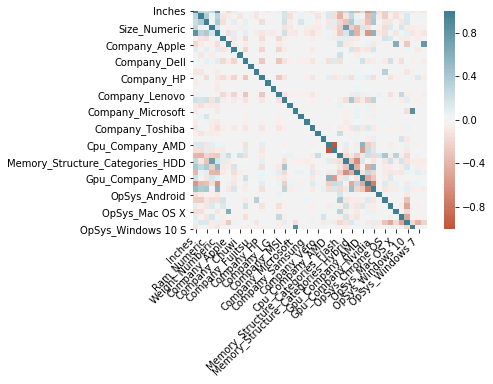

In [105]:
# Correlation heat map

corr = df_2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# View highest correlation for specific variable

print("Highest correlation with price:")
corr["binned"].sort_values(ascending=False)

## Data Pre-Processing

In [88]:
df = df_2[df_2.columns.drop(list(df_2.filter(regex='binned')))]

In [89]:
df

,Inches,CPU_Frequency_Numeric,Ram_Numeric,Size_Numeric,Weight_Numberic,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,Gpu_Company_Nvidia,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,17.3,2.90,32,512,4.70,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,17.3,2.70,32,512,4.60,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,17.3,2.70,16,256,4.60,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,17.3,2.70,32,256,4.60,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,17.3,2.60,16,128,4.60,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,13.3,2.50,8,256,0.81,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1298,10.1,1.44,4,64,0.69,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1299,10.1,1.44,4,64,0.69,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1300,10.1,1.44,4,64,0.69,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [106]:
X = df_2[df_2.columns.drop(list(df_2.filter(regex='binned')))]
y = df_2["binned"]
print(X.shape, y.shape)

(1302, 42) (1302,)


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [109]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [110]:
X_train_scaled

array([[0.6626506 , 0.25925926, 0.03225806, ..., 0.        , 0.        ,
        0.        ],
       [0.46987952, 0.33333333, 0.09677419, ..., 0.        , 0.        ,
        0.        ],
       [0.18072289, 0.25925926, 0.03225806, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46987952, 0.51851852, 0.09677419, ..., 0.        , 0.        ,
        0.        ],
       [0.86746988, 0.25925926, 0.09677419, ..., 0.        , 0.        ,
        0.        ],
       [0.18072289, 0.25925926, 0.03225806, ..., 0.        , 0.        ,
        0.        ]])

In [111]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train_scaled, y_train)

score = model.score(X_test_scaled, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.609109040109405


In [112]:
#Displaying the difference between the actual and the predicted
y_pred = model.predict(X_test_scaled)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

     Actual  Predicted
1232      2   3.453125
1030      7   6.007812
163       6   5.382812
1012      6   4.812500
711       2   2.414062
...     ...        ...
34        6   4.562500
85        5   3.531250
978       4   4.898438
156       7   6.070312
697       4   3.601562

[326 rows x 2 columns]


In [113]:
predictions = model.predict(X_test_scaled)
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

TypeError: Series cannot perform the operation -

## Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.6625766871165644

In [115]:
#Displaying the difference between the actual and the predicted
y_pred = rf.predict(X_test_scaled)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

     Actual  Predicted
1232      2          2
1030      7          6
163       6          6
1012      6          6
711       2          2
...     ...        ...
34        6          6
85        5          4
978       4          5
156       7          7
697       4          3

[326 rows x 2 columns]


## Neural Networks

In [116]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = 42, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='sigmoid'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='tanh'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               11008     
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 77,057
Trainable params: 77,057
Non-trainable params: 0
_________________________________________________________________


In [117]:
NN_model.compile(optimizer='adam',
                   loss='mean_absolute_error',
                   metrics=['accuracy'])

NN_model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 1s - loss: 2.3459 - accuracy: 0.1711
Epoch 2/100
 - 0s - loss: 1.1668 - accuracy: 0.3893
Epoch 3/100
 - 0s - loss: 0.9822 - accuracy: 0.4139
Epoch 4/100
 - 0s - loss: 0.7370 - accuracy: 0.4549
Epoch 5/100
 - 0s - loss: 0.6617 - accuracy: 0.4928
Epoch 6/100
 - 0s - loss: 0.6452 - accuracy: 0.4980
Epoch 7/100
 - 0s - loss: 0.6007 - accuracy: 0.5236
Epoch 8/100
 - 0s - loss: 0.5869 - accuracy: 0.5389
Epoch 9/100
 - 0s - loss: 0.5940 - accuracy: 0.5215
Epoch 10/100
 - 0s - loss: 0.5690 - accuracy: 0.5410
Epoch 11/100
 - 0s - loss: 0.5518 - accuracy: 0.5512
Epoch 12/100
 - 0s - loss: 0.5427 - accuracy: 0.5543
Epoch 13/100
 - 0s - loss: 0.5478 - accuracy: 0.5553
Epoch 14/100
 - 0s - loss: 0.5353 - accuracy: 0.5727
Epoch 15/100
 - 0s - loss: 0.5538 - accuracy: 0.5574
Epoch 16/100
 - 0s - loss: 0.5326 - accuracy: 0.5676
Epoch 17/100
 - 0s - loss: 0.5338 - accuracy: 0.5645
Epoch 18/100
 - 0s - loss: 0.5176 - accuracy: 0.5748
Epoch 19/100
 - 0s - loss: 0.5169 - accuracy: 0.5840
Ep